In [351]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [352]:
surrogate_configs = [
    "Surrogate_Data_V11",
    "Surrogate_Data_V12",
    "Surrogate_Data_V13",
    "Surrogate_Data_V14",
    "Surrogate_Data_V5",
]

targets = [
    "2024-04-28_07-18-23_lightcoral-pretty",
    "2024-04-28_22-59-40_blueviolet-physical",
    "2024-05-14_22-20-02_lightpink-medical",
    "2024-04-10_13-36-12_darkcyan-why",
    "2024-04-29_15-29-39_darkkhaki-quickly",
    "2024-04-28_15-07-53_aliceblue-suddenly",
]

In [353]:
def get_transferabilities(target):
    path = f"/app/wafcraft/results/dataoverlap_adv_experiments/target_{target}/transferability.csv"
    df = pd.read_csv(path)

    means = {}
    deviations = {}

    for config in surrogate_configs:
        # get all entries in df where config column is equal to config
        config_df = df[df["config"] == config]
        mean_samples_evaded_percentage = config_df["samples_evaded_percentage"].mean()
        stddevation_samples_evaded_percentage = config_df[
            "samples_evaded_percentage"
        ].std()
        means[config] = mean_samples_evaded_percentage
        deviations[config] = stddevation_samples_evaded_percentage

    return means, deviations

In [354]:
all_means = {}
all_deviations = {}
for target in targets:
    means, deviations = get_transferabilities(target)
    all_means[target] = means
    all_deviations[target] = deviations

print(all_means)
# calulate the mean and std deviation of the means
means = {}
deviations = {}
for config in surrogate_configs:
    config_means = []
    config_deviations = []
    for target in targets:
        config_means.append(all_means[target][config])
        config_deviations.append(all_deviations[target][config])
    means[config] = sum(config_means) / len(config_means)
    deviations[config] = sum(config_deviations) / len(config_deviations)


print(means)
print(deviations)

{'2024-04-28_07-18-23_lightcoral-pretty': {'Surrogate_Data_V11': 0.8212483113742336, 'Surrogate_Data_V12': 0.8697086374522294, 'Surrogate_Data_V13': 0.9065380464135216, 'Surrogate_Data_V14': 0.8905184555694006, 'Surrogate_Data_V5': 0.8970338958641808}, '2024-04-28_22-59-40_blueviolet-physical': {'Surrogate_Data_V11': 0.8066858312632772, 'Surrogate_Data_V12': 0.8583659170990217, 'Surrogate_Data_V13': 0.896837550314526, 'Surrogate_Data_V14': 0.896562677602141, 'Surrogate_Data_V5': 0.9019628531994404}, '2024-05-14_22-20-02_lightpink-medical': {'Surrogate_Data_V11': 0.835044429701764, 'Surrogate_Data_V12': 0.8774210853149267, 'Surrogate_Data_V13': 0.9279136873070675, 'Surrogate_Data_V14': 0.9147036690278753, 'Surrogate_Data_V5': 0.9244989464436422}, '2024-04-10_13-36-12_darkcyan-why': {'Surrogate_Data_V11': 0.8255343328039811, 'Surrogate_Data_V12': 0.8610477472143173, 'Surrogate_Data_V13': 0.9022722492169656, 'Surrogate_Data_V14': 0.9014038022712993, 'Surrogate_Data_V5': 0.900347368972148}

Means: [0.8304215622762247, 0.871837907041623, 0.9148331033099075, 0.90440418143977, 0.9167245153079281]
Std Devs: [0.04226108007621762, 0.026414908828308464, 0.02505574837982018, 0.030163321321517167, 0.034355432345731365]


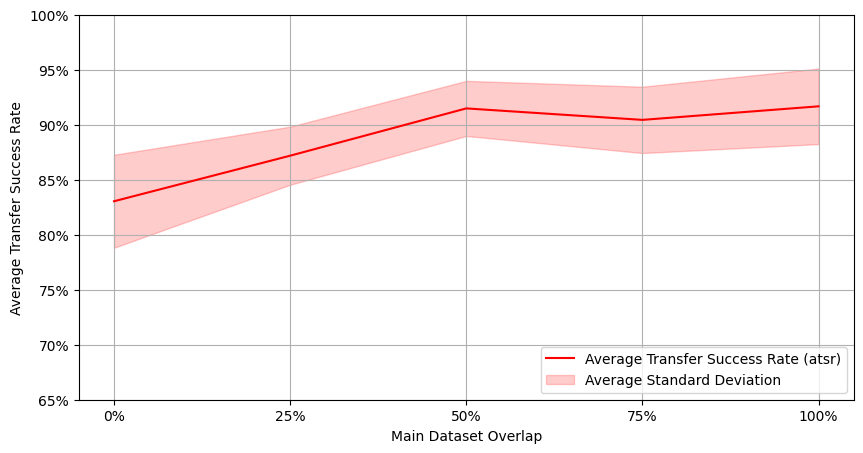

In [355]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

groups = ["0%", "25%", "50%", "75%", "100%"]

means = list(means.values())
std_devs = list(deviations.values())

# new_means, new_devs = get_transferabilities(targets[1])
# means = list(new_means.values())
# std_devs = list(new_devs.values())

print(f"Means: {means}")
print(f"Std Devs: {std_devs}")

plt.figure(figsize=(10, 5))
plt.plot(groups, means, label="Average Transfer Success Rate (atsr)", color="red")


plt.fill_between(
    groups,
    np.array(means) - np.array(std_devs),
    np.array(means) + np.array(std_devs),
    color="red",
    alpha=0.2,
    label="Average Standard Deviation",
)

# title = "Average Mean and Standard Deviation for Transfer Success Rate of Surrogate Models at varying levels of Dataoverlap to Target Models"
xlabel = "Main Dataset Overlap"
ylabel = "Average Transfer Success Rate"

plt.xlabel(xlabel)
plt.ylabel(ylabel)
# plt.title(title)
# plt.legend()

plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.ylim(0.7, 1)
plt.yticks(np.arange(0.65, 1.01, 0.05))

plt.legend(loc="lower right")
plt.grid(True)
plt.show()